## ASASSN photometry analysis

In [1]:
import numpy as np

Let's read in the ASASSN data

In [3]:
#! head /Users/obsidian/Downloads/light_curve_c67bae77-a04d-4fa6-a095-a48ebf1ebd87.csv

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/raw/ASASSN/S1063_ASASSN.csv')

In [6]:
df.head()

,HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err
0,2.457145e+06,2015-05-02.2720197,ba,1.77,15.818,13.310,0.022,18.196,0.363
1,2.457145e+06,2015-05-02.2736430,ba,1.77,15.597,13.323,0.027,17.966,0.444
2,2.457146e+06,2015-05-03.2453243,ba,1.65,15.593,13.355,0.028,17.456,0.446
3,2.457146e+06,2015-05-03.2468908,ba,1.64,15.696,13.401,0.027,16.730,0.406
4,2.457149e+06,2015-05-06.2429599,ba,1.75,16.042,13.374,0.019,17.157,0.296


In [7]:
# %load /Users/obsidian/Desktop/defaults.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

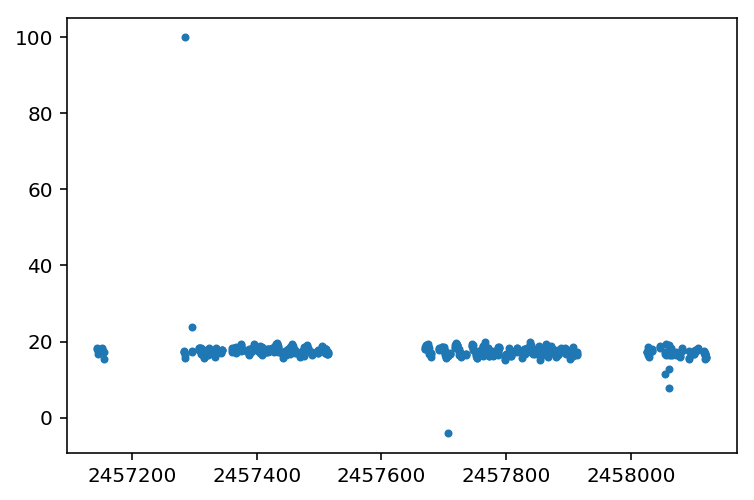

In [8]:
plt.plot(df.HJD, df['flux(mJy)'], '.')

(0.75, 1.2)

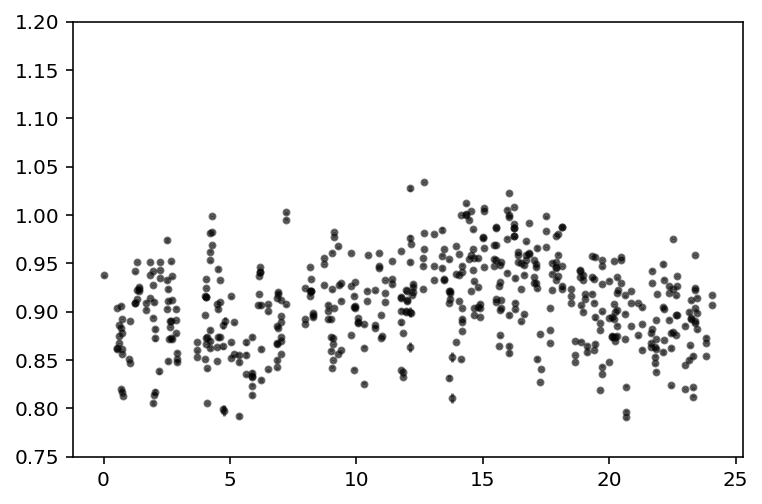

In [26]:
#plt.plot(np.mod(df.HJD,23.897574) , df['flux(mJy)']/260.0, '.')
plt.errorbar(np.mod(df.HJD,24.0798) , df['flux(mJy)']/np.nanmedian(df['flux(mJy)'])/1.1, df['flux_err']/260.0, fmt='k.', alpha=0.5)
plt.ylim(0.75, 1.20)

(2457275, 2457320)

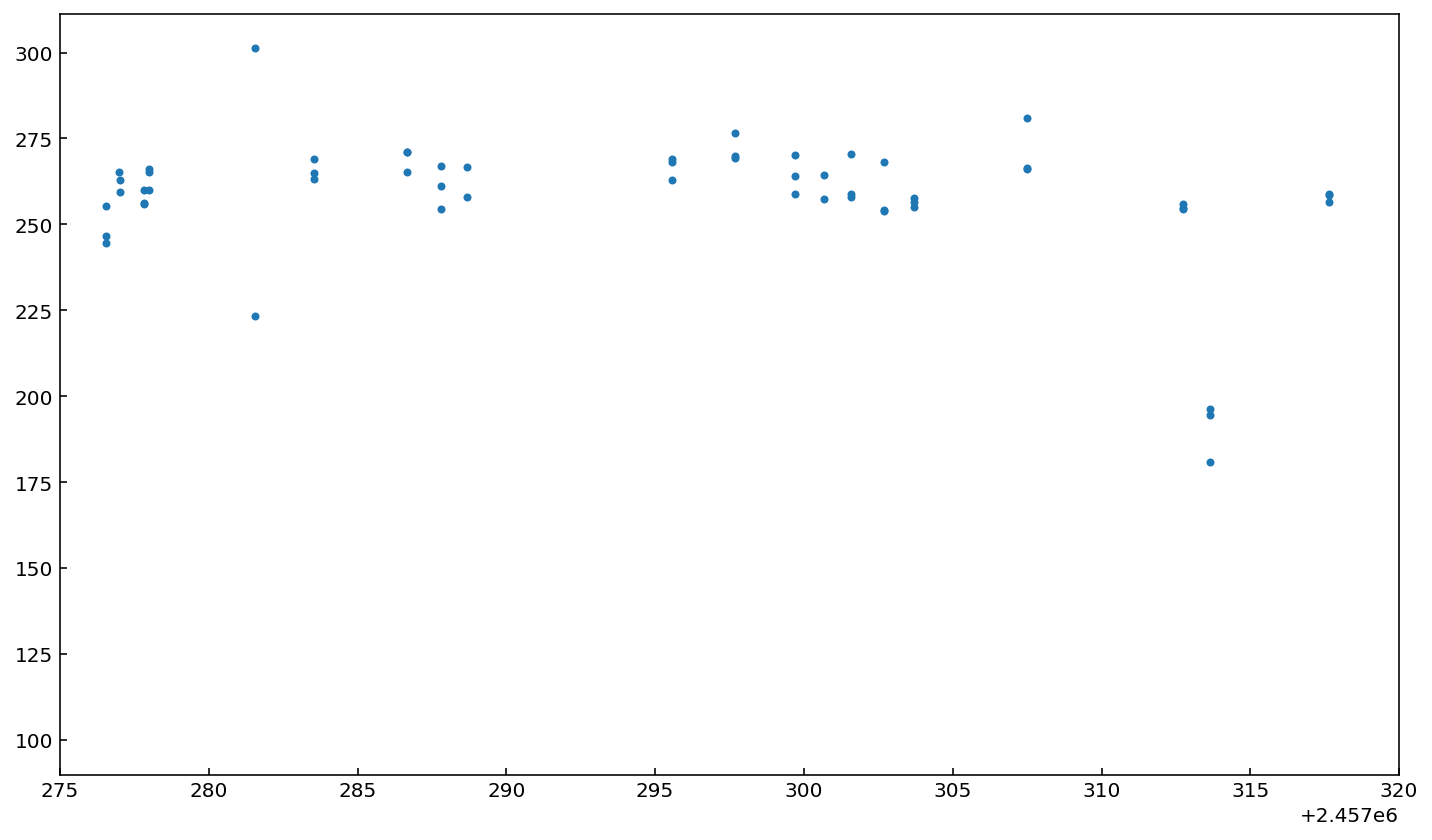

In [19]:
plt.figure(figsize=(12, 7))
plt.plot(df.HJD, df['flux(mJy)'], '.')
plt.xlim(2457000+275, 2457000+320)

In [20]:
df_sub = df[(df.HJD >(2457000+275)) &  (df.HJD <(2457000+320))]

In [21]:
pd.options.display.max_rows = 999

## Try to get a period from the ASAS-SN data alone.

In [15]:
from gatspy import periodic

In [16]:
model = periodic.LombScargle(Nterms=2)
model.optimizer.period_range = (5, 45)
model.fit(df.HJD, df['flux(mJy)'], df.flux_err)

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0xb27acddd8>>

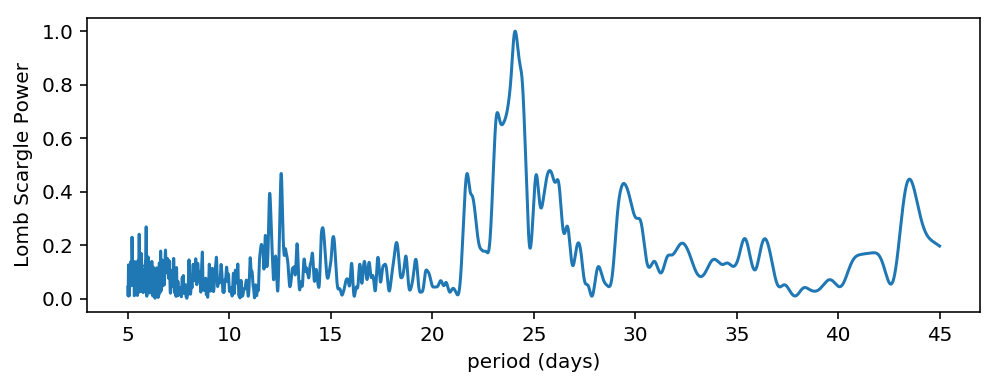

In [21]:
periods = np.linspace(5, 45, 10000)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scores = model.score(periods)
    #scores2 = model2.score(periods)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 3))
fig.subplots_adjust(bottom=0.2)
ax.plot(periods, scores/np.max(scores))
#ax.plot(periods, scores2/np.max(scores2))
ax.set(xlabel='period (days)', ylabel='Lomb Scargle Power')
ax.plot

In [22]:
model.best_period

24.079890147900436